### **Predição de Níveis de Obesidade**

Objetivo:

Nesse projeto, utilizarei a base da dados do Kaggle: Credit Card Fraud Detection para por em prática alguns conceitos importantes de Machine Learning.

Transformei informações qualitativas (como gênero e hábitos) em valores numéricos para treinamento.

* Acurácia geral do modelo (~96%).
* Relatório de classificação com métricas (precisão, recall, F1-score).


 #### 📚 **Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
import seaborn as sns


#### 🔁 **Conectando o Google Colab ao Google Drive**

In [ ]:
from google.colab import files


uploaded = files.upload()


Foi utilizado um dataset extraído do Kaggle. Abaixo estão as colunas presentes no dataset:

- **Gender**: Gênero do indivíduo.
- **Age**: Idade.
- **Height**: Altura em metros.
- **Weight**: Peso em quilos.
- **family_history**: Indica se um membro da família tem ou já teve sobrepeso.
- **FAVC**: Consome alimentos de alta caloria frequentemente?
- **FCVC**: Costuma incluir vegetais nas refeições?
- **NCP**: Quantas refeições principais faz por dia?
- **CAEC**: Costuma consumir alimentos entre as refeições?
- **SMOKE**: Fuma?
- **CH2O**: Quantidade de água ingerida diariamente.
- **SCC**: Monitora as calorias consumidas diariamente?
- **FAF**: Frequência de atividades físicas.
- **TUE**: Tempo dedicado a dispositivos tecnológicos (celular, videogames, televisão, computador etc.).
- **CALC**: Frequência do consumo de álcool.
- **MTRANS**: Meio de transporte usado regularmente.
- **Obesity** (coluna-alvo): Nível de obesidade.

#### **Dando uma olhada na estrutura geral dos dados**

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Obesity prediction.csv']))
print(df)

      Gender        Age    Height      Weight family_history FAVC  FCVC  NCP  \
0     Female  21.000000  1.620000   64.000000            yes   no   2.0  3.0   
1     Female  21.000000  1.520000   56.000000            yes   no   3.0  3.0   
2       Male  23.000000  1.800000   77.000000            yes   no   2.0  3.0   
3       Male  27.000000  1.800000   87.000000             no   no   3.0  3.0   
4       Male  22.000000  1.780000   89.800000             no   no   2.0  1.0   
...      ...        ...       ...         ...            ...  ...   ...  ...   
2106  Female  20.976842  1.710730  131.408528            yes  yes   3.0  3.0   
2107  Female  21.982942  1.748584  133.742943            yes  yes   3.0  3.0   
2108  Female  22.524036  1.752206  133.689352            yes  yes   3.0  3.0   
2109  Female  24.361936  1.739450  133.346641            yes  yes   3.0  3.0   
2110  Female  23.664709  1.738836  133.472641            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC   

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.dtypes


,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


#### **Transformando o DataFrame e as variáveis categóricas em valores numéricos com LabelEncoder para o modelo**

In [7]:
label_encoder = LabelEncoder()
for col in ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]:
    df[col] = label_encoder.fit_transform(df[col])


### **Fazendo a padronização das variáveis independentes para garantir escala uniforme e aseparação em variáveis independentes (X) e dependente (y)**

In [8]:
X = df.drop(columns=["Obesity"])
y = df["Obesity"]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### **Treinamento do modelo Random Forest**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# predição no conjunto de teste
y_pred = model.predict(X_test)


#### **Fazendo a avaliação do modelo com métricas principais**

In [13]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9574468085106383

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.90      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



#### **Visualizando com matplotlib, yellowbrick, ClassificationReport e Seaborn**

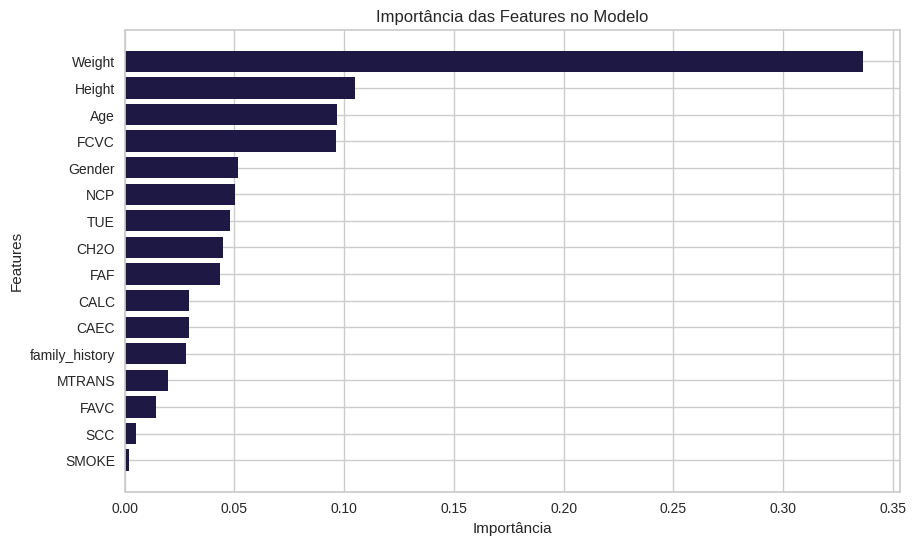

In [17]:
feature_importances = model.feature_importances_
features = pd.DataFrame({
    'Feature': df.drop(columns=['Obesity']).columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='#1e1845')
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()
plt.show()


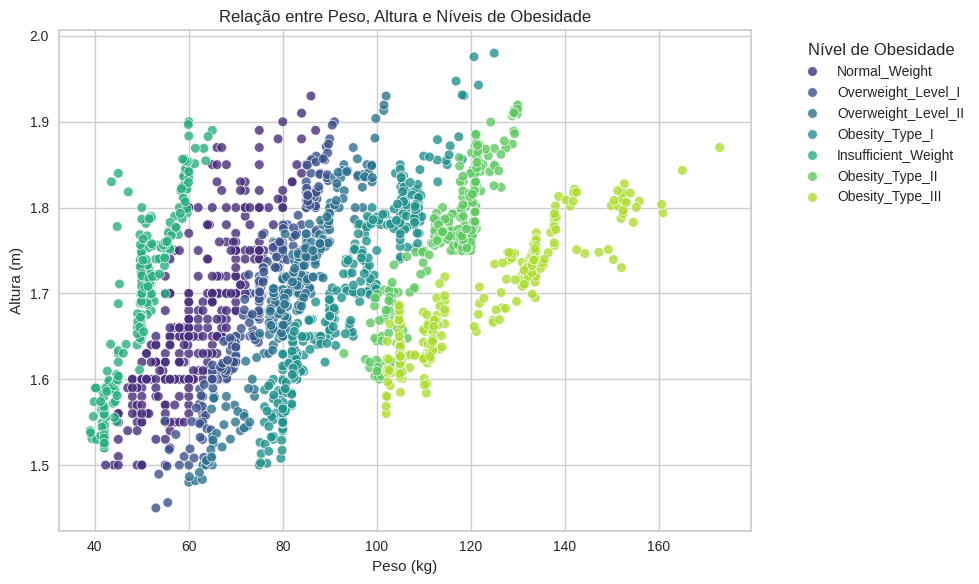

In [22]:
df['Obesity_Class'] = label_encoder.inverse_transform(df['Obesity'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='Obesity_Class', palette='viridis', alpha=0.8)
plt.title('Relação entre Peso, Altura e Níveis de Obesidade')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
